In [1]:
# Import packages
import torch
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from torch.utils.data import TensorDataset, DataLoader
from torch import nn
import sklearn
import math
# Classification models
from sklearn.ensemble import (
    RandomForestRegressor,
    GradientBoostingRegressor,
    BaggingClassifier,
    GradientBoostingClassifier,
    RandomForestClassifier,
)
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import LinearSVC
# Linear regression models
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import BayesianRidge
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
from matplotlib.collections import LineCollection
from matplotlib.pyplot import style
import seaborn as sns
import sklearn
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectFromModel
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import SGDRegressor
from sklearn.kernel_ridge import KernelRidge
import pickle
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
print(pd.__version__)

1.5.3


In [3]:
# Unzip the dataset
!unzip student.zip

Archive:  student.zip
  inflating: student-mat.csv         
  inflating: student-por.csv         
  inflating: student-merge.R         
  inflating: student.txt             


## Data Loading and Preprocessing


In [4]:
# Read in the data
data = pd.read_csv("student-mat.csv", sep=";")
pd.set_option('display.max_columns', None)
data.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,course,mother,2,2,0,yes,no,no,no,yes,yes,no,no,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,course,father,1,2,0,no,yes,no,no,no,yes,yes,no,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,other,mother,1,2,3,yes,no,yes,no,yes,yes,yes,no,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,home,mother,1,3,0,no,yes,yes,yes,yes,yes,yes,yes,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,home,father,1,2,0,no,yes,yes,no,yes,yes,no,no,4,3,2,1,2,5,4,6,10,10


In [5]:
# Try one hot encoding instead
data_ohe = pd.get_dummies(data, drop_first=True)
data_ohe.head()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3,school_MS,sex_M,address_U,famsize_LE3,Pstatus_T,Mjob_health,Mjob_other,Mjob_services,Mjob_teacher,Fjob_health,Fjob_other,Fjob_services,Fjob_teacher,reason_home,reason_other,reason_reputation,guardian_mother,guardian_other,schoolsup_yes,famsup_yes,paid_yes,activities_yes,nursery_yes,higher_yes,internet_yes,romantic_yes
0,18,4,4,2,2,0,4,3,4,1,1,3,6,5,6,6,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,1,1,0,0
1,17,1,1,1,2,0,5,3,3,1,1,3,4,5,5,6,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,1,0
2,15,1,1,1,2,3,4,3,2,2,3,3,10,7,8,10,0,0,1,1,1,0,0,0,0,0,1,0,0,0,1,0,1,0,1,0,1,0,1,1,1,0
3,15,4,2,1,3,0,3,2,2,1,1,5,2,15,14,15,0,0,1,0,1,1,0,0,0,0,0,1,0,1,0,0,1,0,0,1,1,1,1,1,1,1
4,16,3,3,1,2,0,4,3,2,1,2,5,4,6,10,10,0,0,1,0,1,0,1,0,0,0,1,0,0,1,0,0,0,0,0,1,1,0,1,1,0,0


## Analyze Data

<Axes: xlabel='G3', ylabel='count'>

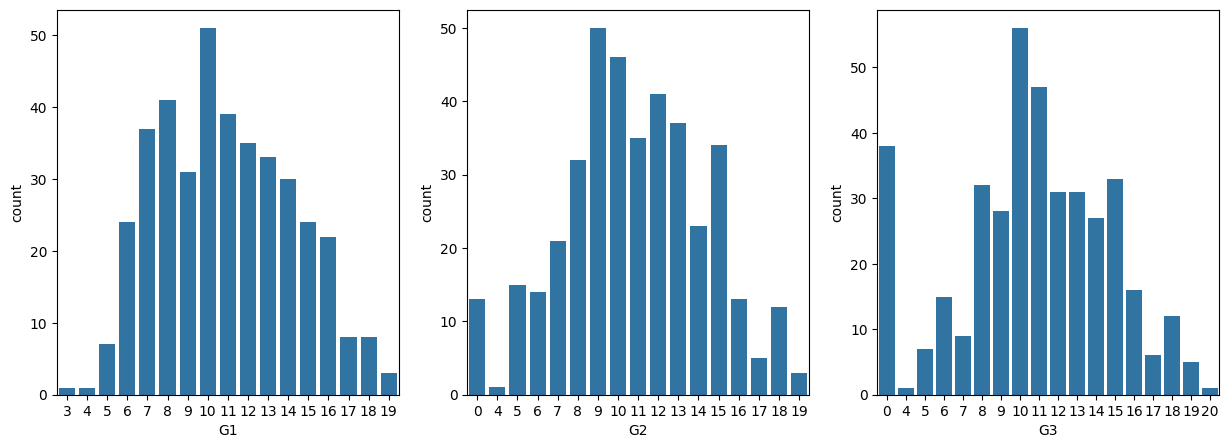

In [6]:
# Plot the G1, G2, and G3 dist
plt.figure(figsize=(15,5))
plt.subplot(1,3,1)
sb.countplot(x=data["G1"])

plt.subplot(1,3,2)
sb.countplot(x=data["G2"])

plt.subplot(1,3,3)
sb.countplot(x=data["G3"])

There seems to be a very high number of 0's in the final G3 dataset. I can't find an explanation for the occurence from the source of the data. I will proceed by filtering out data that has a 0 in the G3 grade.

In [7]:
# Remove all rows of data with 0 in G3
data_ohe = data_ohe[data_ohe["G3"] != 0]

<Axes: xlabel='G3', ylabel='count'>

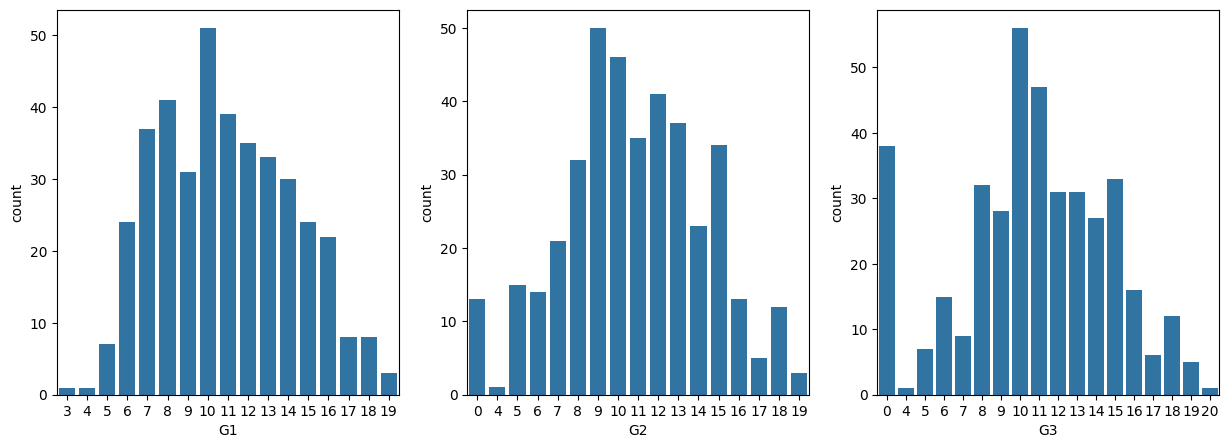

In [8]:
# Plot altered data
plt.figure(figsize=(15,5))
plt.subplot(1,3,1)
sb.countplot(x=data["G1"])

plt.subplot(1,3,2)
sb.countplot(x=data["G2"])

plt.subplot(1,3,3)
sb.countplot(x=data["G3"])

This altered dataset appears to be much more logical and follows the dist of G1 and G2

<Axes: >

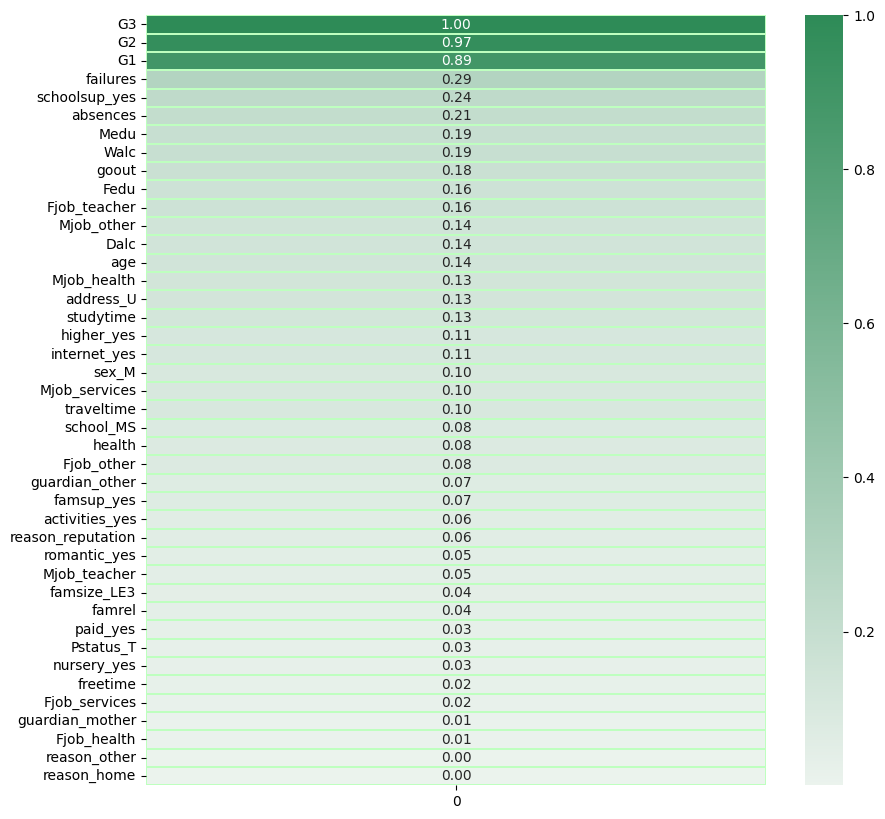

In [9]:
# Let's check the correlation of the different variables with oure target variable
corr = abs(data_ohe.corrwith(data["G3"])) # Take absolute value beacuse we only care wether the data correlates well or not, not about the direction of correlation
corr = corr.sort_values(ascending=False) # Sort by most corralation to least corralation

# Plot the heatmap of correlations
plt.figure(figsize=(10,10))
custom_cmap = sb.light_palette("seagreen", as_cmap=True)
sb.heatmap(pd.DataFrame(corr), cmap=custom_cmap, annot=True, linecolor = "#BEFFBF", linewidths=0.2, fmt=".2f")

## Experimentation Step


In [10]:
# Tweaking the input data based on correlation
corr_min = 0.14
data_ohe_after_corr = data_ohe.loc[:, abs(data_ohe.corr()['G3']) >= corr_min]
used_cols = list(data_ohe_after_corr.columns)

print(f"Columns in use (corr_min = {corr_min}):\n{used_cols}")

Columns in use (corr_min = 0.14):
['age', 'Medu', 'Fedu', 'failures', 'goout', 'Dalc', 'Walc', 'absences', 'G1', 'G2', 'G3', 'Mjob_other', 'Fjob_teacher', 'schoolsup_yes']


## Loading data into DataLoaders

In [12]:
# 4. Split up data into train, test, valid
y = data_ohe_after_corr["G3"]
X = data_ohe_after_corr.drop(["G3"], axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.10, random_state=1, shuffle=True)
# X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.10, random_state=1) # 0.25 x 0.8 = 0.2

print(f"X_train: {len(X_train)}, X_test: {len(X_test)}")

X_train: 321, X_test: 36


In [13]:
# Convert dataframe into tensors
X_train_tensor = torch.from_numpy(X_train.to_numpy(dtype=np.float32))
y_train_tensor = torch.from_numpy(y_train.to_numpy(dtype=np.int64))

X_test_tensor = torch.from_numpy(X_test.to_numpy(dtype=np.float32))
y_test_tensor = torch.from_numpy(y_test.to_numpy(dtype=np.int64))

# Convert tensors into DataLoaders
trainset = TensorDataset(X_train_tensor, y_train_tensor)
testset = TensorDataset(X_test_tensor, y_test_tensor)

trainloader = torch.utils.data.DataLoader(trainset, batch_size=128, shuffle=True)
testloader = torch.utils.data.DataLoader(testset, batch_size=128, shuffle=False)

## Training Loop

In [ ]:
class EarlyStopping:
    def __init__(self, tolerance=5, min_delta=0):
        '''
        tolerance (int): How many epochs the training can go without improving before stopping
        min_delta (float): min amount improvement from best loss to count as an improvement
        '''
        self.tolerance = tolerance
        self.min_delta = min_delta
        self.counter = 0
        self.early_stop = False
        self.best_loss = 1000
        self.loss_list = []

    def __call__(self, validation_loss):
      if len(self.loss_list) == self.tolerance:
        self.loss_list.pop(0)
        self.loss_list.append(validation_loss)
      else:
        self.loss_list.append(validation_loss)


      if validation_loss > self.best_loss - self.min_delta:
          self.counter +=1
          if self.counter >= self.tolerance:
              self.early_stop = True
      else:
        self.best_loss = validation_loss
        self.counter = 0

In [ ]:
# Training loop
def train_model(model, epochs, optimizer, criterion, early_stopping):
    epochs = epochs
    steps = 0
    running_loss = 0
    print_every = int(len(trainloader)-1)
    tot_train_loss = []
    tot_val_loss = []
    tot_val_accuracy = []
    for epoch in range(epochs):

      for images, labels in trainloader:
          model.train()
          steps+=1

          images, labels = images.to(device), labels.to(device)

          optimizer.zero_grad()

          logpbs = model(images)
          #print(f"Len labels: {len(labels)}")
          #print(f"Len Pbs: {len(logpbs)}")
          loss= criterion(logpbs, labels)
          #print(f"LOSS SUCCESS")
          loss.backward()
          optimizer.step()

          running_loss+=loss.item()
          if steps % print_every == 0:
              model.eval()
              val_loss = 0
              accuracy = 0

              for images, labels in testloader:
                  images, labels = images.to(device), labels.to(device)

                  logpbs = model(images)
                  loss = criterion(logpbs, labels)
                  val_loss += loss.item()

                  # calculate our accuracy
                  pbs = torch.exp(logpbs)
                  top_ps, top_class = pbs.topk(1, dim=1)
                  equality = top_class == labels.view(*top_class.shape)
                  accuracy += torch.mean(equality.type(torch.FloatTensor)).item()

              # Getting the average from each batch
              print(f"Epoch: {epoch+1}/{epochs}.."
                    f"Train loss: {running_loss/print_every:.3f}.."
                    f"Val loss: {val_loss/len(testloader):.3f}.."
                    f"Val accuracy: {accuracy/len(testloader):.3f}..")
              # keep track of totals
              tot_train_loss.append(running_loss/print_every)
              tot_val_loss.append(val_loss/len(testloader))
              tot_val_accuracy.append(accuracy/len(testloader))

              running_loss = 0
              model.train()
      early_stopping(val_loss/len(testloader))
      if early_stopping.early_stop:
        print(f"We are at epoch:{epoch+1}\nLowest Loss:{early_stopping.best_loss}\nLast {early_stopping.tolerance} losses:{early_stopping.loss_list}" )
        break
    return (accuracy/len(testloader), val_loss/len(testloader), tot_val_loss, tot_train_loss, tot_val_accuracy, epoch+1)

## Pytorch Model Creation

In [ ]:
X_train.shape, y_train.shape

((321, 18), (321,))

In [ ]:
# Set the device to GPU if available
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [ ]:
# 6. Simple dense model
model = nn.Sequential(
    nn.Linear(len(X.columns), 14),
    nn.ReLU(),
    nn.Linear(14, 14),
    nn.ReLU(),
    nn.Linear(14, 21),
    nn.LogSoftmax(dim=1)
)

model.to(device)

# Hyper parameters
criterion = nn.NLLLoss()
optimizer = torch.optim.Adam(model.parameters(), 0.007)
epochs = 1000

In [ ]:
# Train model
early_stopping = EarlyStopping(tolerance=100, min_delta=0)
accuracy, val_loss, tot_val_loss, tot_train_loss, tot_val_accuracy, epochs = train_model(model, epochs, optimizer, criterion, early_stopping)

Epoch: 1/1000..Train loss: 3.020..Val loss: 2.950..Val accuracy: 0.111..
Epoch: 2/1000..Train loss: 2.861..Val loss: 2.832..Val accuracy: 0.056..
Epoch: 2/1000..Train loss: 2.818..Val loss: 2.749..Val accuracy: 0.111..
Epoch: 3/1000..Train loss: 2.743..Val loss: 2.684..Val accuracy: 0.083..
Epoch: 4/1000..Train loss: 2.604..Val loss: 2.650..Val accuracy: 0.056..
Epoch: 4/1000..Train loss: 2.625..Val loss: 2.617..Val accuracy: 0.083..
Epoch: 5/1000..Train loss: 2.574..Val loss: 2.571..Val accuracy: 0.083..
Epoch: 6/1000..Train loss: 2.514..Val loss: 2.535..Val accuracy: 0.139..
Epoch: 6/1000..Train loss: 2.516..Val loss: 2.509..Val accuracy: 0.167..
Epoch: 7/1000..Train loss: 2.455..Val loss: 2.494..Val accuracy: 0.139..
Epoch: 8/1000..Train loss: 2.406..Val loss: 2.500..Val accuracy: 0.167..
Epoch: 8/1000..Train loss: 2.394..Val loss: 2.490..Val accuracy: 0.222..
Epoch: 9/1000..Train loss: 2.338..Val loss: 2.447..Val accuracy: 0.222..
Epoch: 10/1000..Train loss: 2.333..Val loss: 2.391.

In [ ]:
# Using normalized numbers for training
# Data normalization
data_ohe_after_norm = data_ohe_after_corr.copy()
data_ohe_after_norm[["G1","G2","G3"]] = data_ohe_after_norm[["G1","G2","G3"]].div(20)
print(data_ohe_after_norm.head())

X = data_ohe_after_norm.drop(["G3"], axis=1)
y = data_ohe_after_norm["G3"]
print("Y\n", y)

# Split up the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.10, random_state=1, shuffle=True)
# Convert dataframe into tensors
X_train_tensor = torch.from_numpy(X_train.to_numpy(dtype=np.float32))
y_train_tensor = torch.from_numpy(y_train.to_numpy(dtype=np.int64))

X_test_tensor = torch.from_numpy(X_test.to_numpy(dtype=np.float32))
y_test_tensor = torch.from_numpy(y_test.to_numpy(dtype=np.int64))

# Convert tensors into DataLoaders
trainset = TensorDataset(X_train_tensor, y_train_tensor)
testset = TensorDataset(X_test_tensor, y_test_tensor)

trainloader = torch.utils.data.DataLoader(trainset, batch_size=128, shuffle=True)
testloader = torch.utils.data.DataLoader(testset, batch_size=128, shuffle=False)

   Medu  Fedu  failures  goout  Walc  absences    G1    G2    G3  \
0     4     4         0      4     1         6  0.25  0.30  0.30   
1     1     1         0      3     1         4  0.25  0.25  0.30   
2     1     1         3      2     3        10  0.35  0.40  0.50   
3     4     2         0      2     1         2  0.75  0.70  0.75   
4     3     3         0      2     2         4  0.30  0.50  0.50   

   Fjob_teacher  schoolsup_yes  
0             1              1  
1             0              0  
2             0              1  
3             0              0  
4             0              0  
Y
 0      0.30
1      0.30
2      0.50
3      0.75
4      0.50
       ... 
390    0.45
391    0.80
392    0.35
393    0.50
394    0.45
Name: G3, Length: 357, dtype: float64


##Visualizing Results

In [ ]:
# Test on test set
with torch.no_grad():
  accuracy = 0
  model.eval()
  for images, labels in testloader:
    images, labels = images.to(device), labels.to(device)

    logpbs = model(images)
    loss = criterion(logpbs, labels)
    val_loss += loss.item()

    # calculate our accuracy
    pbs = torch.exp(logpbs)
    top_ps, top_class = pbs.topk(1, dim=1)
    equality = top_class == labels.view(*top_class.shape)
    accuracy += torch.mean(equality.type(torch.FloatTensor)).item()
    accuracy = accuracy/len(testloader)
  print(accuracy)

0.4444444477558136


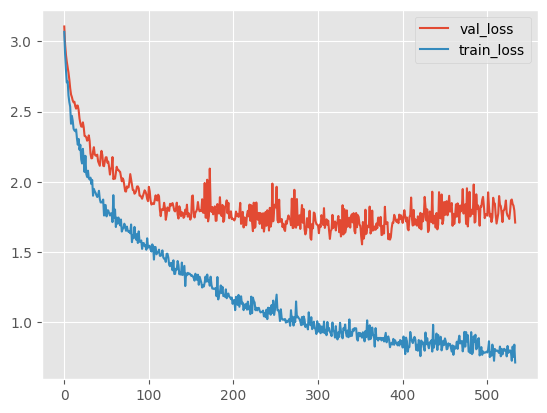

In [ ]:
# Plot training and validation loss
plt.plot(tot_val_loss, label='val_loss');
plt.plot(tot_train_loss, label='train_loss')
plt.legend();

## Saving Trials

In [ ]:
from google.colab import drive
from datetime import date
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [ ]:
# Save trial information
from google.colab import files
def save_log(log):
  '''
  Log is a dictionary object with:
  - used_cols (list)
  - epochs (int)
  - val_accuracy (float)
  - val_loss (float)
  - tot_val_loss (list)
  - tot_val_accuracy (list)
  - model_state
  - A note for context
  - Date
  '''

  with open("/content/drive/MyDrive/capstone_log.txt", "a+") as f:
    # Header for each entry
    f.seek(0) # Start at the top to read the file lines
    lines = len(f.readlines())
    intro = f"Trial Number {1 + (lines // 9)}:\n"

    # If this is not the first entry in the file
    if lines != 0:
      intro = "\n" + intro
    print(lines)
    # Write
    f.write(intro)
    for key, value in log.items():
        f.write('%s:%s\n' % (key, value))

In [ ]:
# Save Log
model_state = []
for param_tensor in model.state_dict():
    model_state.append([param_tensor, model.state_dict()[param_tensor].size()])

note = "Lr testing: 10% corr"

log = {
    "used_cols": used_cols,
    "epochs and lr": [epochs, optimizer.state_dict()["param_groups"][0]["lr"]],
    "val_accuracy": accuracy,
    "val_loss": val_loss,
    "tot_val_loss": tot_val_loss,
    "tot_val_accuracy": tot_val_accuracy,
    "model_state": model_state,
    "note": note,
    "date": date.today()
    }


save_log(log)

87


# Other machhine learning techniques

## ML classification and ML Linear modeling techniques


In [ ]:
# Keep logs of each trial
results_class = {}
results_linear = {}

In [14]:
# Imports
style.use("ggplot")

In [66]:
# Make sure we are using the right data (Just went crazy trying combinations of attributes)
X = data_ohe_after_corr.drop(["G3"], axis=1)
X = X.drop(["Dalc", "Walc"], axis=1)
X["studytime"] = data_ohe["studytime"]
# X["freetime"] = data_ohe["freetime"]
X["internet_yes"] = data_ohe["internet_yes"]
# X["activities_yes"] = data_ohe["activities_yes"]
X["traveltime"] = data_ohe["traveltime"]
y = data_ohe_after_corr["G3"]

# Split up the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.10, random_state=1, shuffle=True)

print(X.columns)

Index(['age', 'Medu', 'Fedu', 'failures', 'goout', 'absences', 'G1', 'G2',
       'Mjob_other', 'Fjob_teacher', 'schoolsup_yes', 'studytime',
       'internet_yes', 'traveltime'],
      dtype='object')


In [59]:
# Test many classification models
def train_class(X_train, y_train, X_test, y_test):
   model1 = BaggingClassifier()
   model2 = DecisionTreeClassifier()
   model3 = LinearSVC(max_iter=10000)
   model4 = KNeighborsClassifier()
   model5 = RandomForestClassifier()
   model6 = GradientBoostingClassifier()
   model7 = sklearn.svm.SVC()
   models = [model1, model2, model3, model4, model5, model6, model7]
   model_names = ['BaggingClassifier', 'DecisionTreeClassifier', 'LinearSVC', 'KNeighborsClassifier', 'RandomForestClassifier', 'GradientBoostingClassifier', "SVC"]
   results = pd.DataFrame(columns=["Test Accuracy"], index=model_names)

   for i, model in enumerate(models):
     model.fit(X_train, y_train)
     # Make predictions on the test set
     y_pred = model.predict(X_test)
     # Calculate evaluation metrics
     accuracy = accuracy_score(y_test, y_pred)


     model_name = model_names[i]
     results.loc[model_name, :] = [accuracy]

   return results

In [60]:
# Custom accuracy function for linear model
def linear_accuracy_score(y_true, y_pred):
  if len(y_true) != len(y_pred):
    print("mismatching input sizes")

  total = len(y_true)
  correct = 0

  for i, pred in enumerate(y_pred):
    if abs(pred - y_true.to_numpy()[i]) < 0.2: # less than 5% around the true value
      correct += 1

  return correct / total

In [61]:
# Test many Linear models


def train_linear(X_train, y_train, X_test , y_test):
  # Test many linear regression models
  model1 = LinearRegression()
  model2 = BayesianRidge(n_iter=500)
  model3 = RandomForestRegressor()
  model4 = GradientBoostingRegressor()
  model5 = DecisionTreeRegressor()
  model6 = ElasticNet()
  model7 = KernelRidge(coef0=4)

  models = [model1, model2, model3, model4, model5, model6, model7]
  model_names = ['LinearRegression', 'BayesianRidge', 'RandomForestRegressor', 'GradientBoostingRegressor','DecisionTreeRegressor', "ElasticNet", "KernelRidge"]
  results = pd.DataFrame(columns=["RMSE", "MSE"], index=model_names)

  preds = []
  for i, model in enumerate(models):
    model.fit(X_train, y_train)
    # Make predictions on the test set
    y_pred = model.predict(X_test)
    preds.append(y_pred)
    # Calculate evaluation metrics
    mse = sklearn.metrics.mean_squared_error(y_test, y_pred)
    rmse = math.sqrt(mse)
    # accuracy = linear_accuracy_score(y_test, y_pred)

    model_name = model_names[i]
    results.loc[model_name, :] = [rmse, mse]

  return results, models

In [62]:
# Train with correlation features and train with selected features
results_corr_class = train_class(X_train, y_train, X_test, y_test)
results_corr_linear, corr_linear_models = train_linear(X_train, y_train, X_test, y_test)

print("Classification:", results_corr_class)
print("Linear:", results_corr_linear)

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Classification:                            Test Accuracy
BaggingClassifier                    0.5
DecisionTreeClassifier          0.555556
LinearSVC                       0.222222
KNeighborsClassifier            0.277778
RandomForestClassifier          0.416667
GradientBoostingClassifier      0.555556
SVC                                 0.25
Linear:                                RMSE       MSE
LinearRegression           0.760814  0.578837
BayesianRidge               0.76073   0.57871
RandomForestRegressor      0.877667    0.7703
GradientBoostingRegressor  0.874644  0.765002
DecisionTreeRegressor      0.942809  0.888889
ElasticNet                 0.805413   0.64869
KernelRidge                0.761321  0.579609


In [63]:
# Log results
results_class["0.14 corr with studytime and internet_yes and activities_yes and traveltime"] = results_corr_class
results_linear["0.14 corr with studytime and internet_yes and traveltime without alc"] = results_corr_linear

In [71]:

clf = corr_linear_models[1]
with open("14-feature-model.pkl", "wb") as f:
  pickle.dump(clf, f)

In [64]:
results_linear

{'0.14 corr with studytime and internet_yes and activities_yes and traveltime':                                RMSE       MSE
 LinearRegression           0.759294  0.576527
 BayesianRidge              0.759094  0.576224
 RandomForestRegressor      0.835086  0.697369
 GradientBoostingRegressor  0.877553  0.770099
 DecisionTreeRegressor      1.178511  1.388889
 ElasticNet                 0.805413   0.64869
 KernelRidge                0.759662  0.577086,
 '0.14 corr with studytime and internet_yes and activities_yes and traveltime without alc':                                RMSE       MSE
 LinearRegression           0.761382  0.579703
 BayesianRidge               0.76129  0.579563
 RandomForestRegressor      0.889903  0.791928
 GradientBoostingRegressor  0.872146  0.760639
 DecisionTreeRegressor      1.154701  1.333333
 ElasticNet                 0.805413   0.64869
 KernelRidge                0.761881  0.580463,
 '0.14 corr with studytime and internet_yes and traveltime without alc':    

In [65]:
with open("ML_log.txt", "a") as f:
  for key,value in results_linear.items():
    f.write(key)
    f.write(str(value))
    f.write('\n')

In [ ]:
# R2 score
y_preds = corr_linear_models[0].predict(X_test)
sklearn.metrics.r2_score(y_test , y_preds)*100

94.15359619045823

### Graph the results

Text(0.5, 1.0, 'Predicted Grade Vs True Grade')

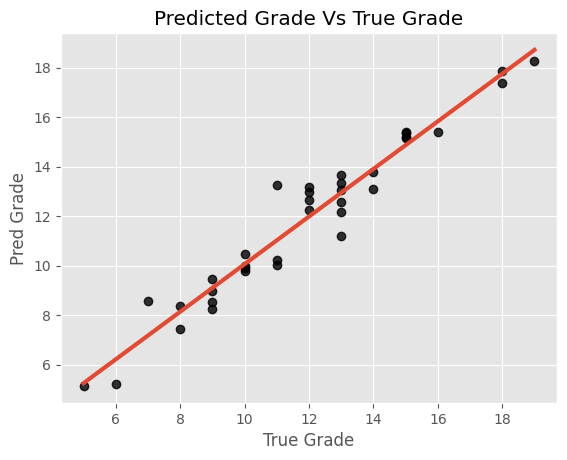

In [ ]:
# Graph of results vs preds

ax = sns.regplot(x=y_test, y=preds[0], scatter_kws={"color":"black"}, line_kws={"lw":3}, ci=None)
distance = [y_test - y_pred]

plt.xlabel("True Grade")
plt.ylabel("Pred Grade")
plt.title("Predicted Grade Vs True Grade")

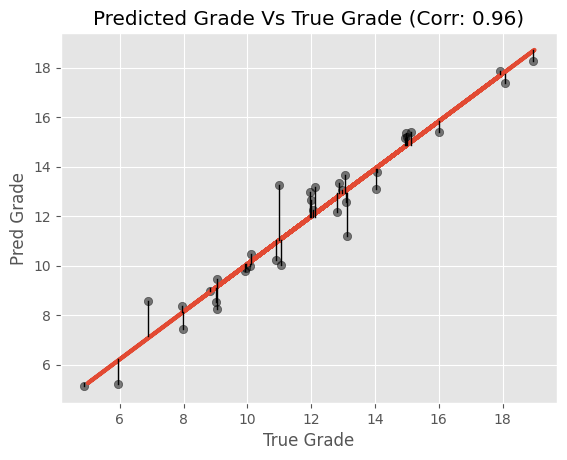

In [ ]:


y_test = np.array(y_test)  # Making sure it's a numpy array
pred = np.array(preds[0])

jitter_amount = 0.1
y_test_jittered = y_test + np.random.normal(0, jitter_amount, y_test.size)

# Calculate coefficients for the line of best fit without jitter
slope, intercept = np.polyfit(y_test, pred, 1)

# Calculate the y values of the line of best fit without jitter
line_y = slope * y_test + intercept

# Create the scatter plot with jittered x values
plt.scatter(y_test_jittered, pred, color="black", alpha = 0.5)

# Plot the line of best fit (no jitter applied here)
plt.plot(y_test, line_y, linewidth=3)

# Calculate and plot the distance lines from each point to the line of best fit
for i in range(len(y_test)):
    plt.plot([y_test_jittered[i], y_test_jittered[i]], [pred[i], line_y[i]], color="black", linewidth=1)

plt.xlabel("True Grade")
plt.ylabel("Pred Grade")
plt.title(f"Predicted Grade Vs True Grade (Corr: {slope:.2f})")

plt.savefig("Truth_labels_vs_Pred_labels_with_jitter.svg", bbox_inches='tight')
plt.show()

## Train models through Feature Selection by RandomForest and not just Corr

In [ ]:
# Run a feature analysis to determine the best features to utilize for prediction
y = data_ohe["G3"]
X = data_ohe.drop(["G3"], axis=1)

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.10, random_state=1, shuffle=True)

In [ ]:
X_train_clf = X_train.drop(["G1", "G2"], axis=1)
clf = RandomForestRegressor(n_estimators = 100)
clf.fit(X_train_clf, y_train)

RandomForestRegressor()

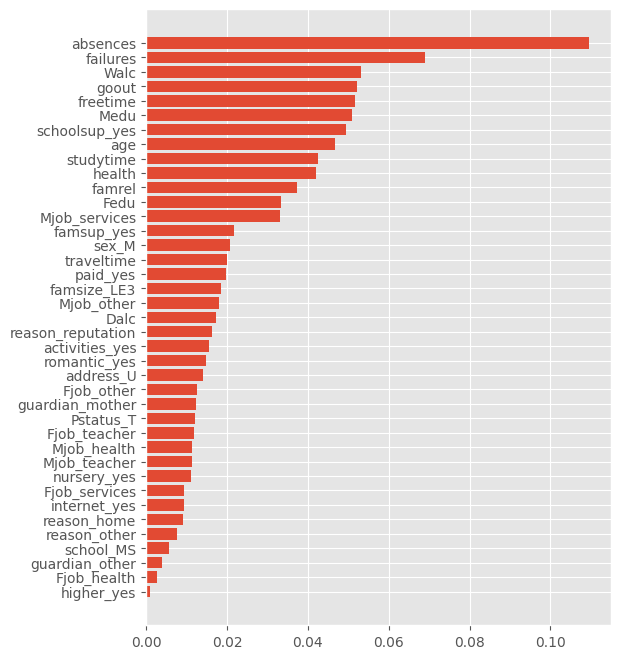

In [ ]:
importances = clf.feature_importances_
ranks = np.argsort(importances)[::-1]
ranks

f_i = list(zip(X_train_clf.columns,importances))
f_i.sort(key = lambda x : x[1])

plt.figure(figsize=(6,8))
plt.barh([x[0] for x in f_i],[x[1] for x in f_i])
plt.show()

In [ ]:
selected_feat = list(X_train_clf.columns[ranks[:15]])
selected_feat.append("G1")
selected_feat.append("G2")
selected_feat

['absences',
 'failures',
 'Medu',
 'age',
 'schoolsup_yes',
 'Walc',
 'goout',
 'freetime',
 'studytime',
 'famrel',
 'health',
 'Fedu',
 'Mjob_services',
 'sex_M',
 'paid_yes',
 'G1',
 'G2']

In [ ]:
# Train models on the selected features
X_feat_train = X_train[selected_feat]
print(selected_feat)
results_features_class = train_class(X_feat_train, y_train, X_test, y_test)
results_features_linear, models = train_linear(X_feat_train, y_train, X_test, y_test)

['absences', 'failures', 'Medu', 'age', 'schoolsup_yes', 'Walc', 'goout', 'freetime', 'studytime', 'famrel', 'health', 'Fedu', 'Mjob_services', 'sex_M', 'paid_yes', 'G1', 'G2']


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


In [ ]:
# Results
results_features_class, results_features_linear

(                           Test Accuracy
 BaggingClassifier               0.555556
 DecisionTreeClassifier          0.388889
 LinearSVC                       0.222222
 KNeighborsClassifier            0.305556
 RandomForestClassifier          0.416667
 GradientBoostingClassifier      0.472222
 SVC                                 0.25,
                                RMSE       MSE
 LinearRegression           0.825742  0.681849
 BayesianRidge              0.818812  0.670454
 RandomForestRegressor      0.886148  0.785258
 GradientBoostingRegressor  0.906393  0.821548
 DecisionTreeRegressor      1.322876      1.75
 ElasticNet                 0.805413   0.64869
 KernelRidge                0.826684  0.683406)

In [ ]:
# R2
y_preds = models[1].predict(X_test[X_feat_train.columns])
sklearn.metrics.r2_score(y_test , y_preds)*100

93.9366975375021

In [ ]:
# Add to logs
results_linear["RandomForestsRegressor feats"] = results_features_linear
results_class["RandomForestsRegressor feats"] = results_features_class

In [ ]:
# View diff
results_linear

{'.15 corr linear':                                RMSE       MSE
 LinearRegression           0.763834  0.583442
 BayesianRidge              0.763887  0.583524
 RandomForestRegressor       0.86905  0.755247
 GradientBoostingRegressor  0.856115  0.732933
 DecisionTreeRegressor       1.20185  1.444444
 ElasticNet                 0.805413   0.64869
 KernelRidge                0.779094  0.606988,
 'RandomForests feats':                                RMSE       MSE
 LinearRegression           0.808016   0.65289
 BayesianRidge              0.803744  0.646004
 RandomForestRegressor      0.879856  0.774147
 GradientBoostingRegressor  0.915144  0.837489
 DecisionTreeRegressor      1.301708  1.694444
 ElasticNet                 0.805413   0.64869
 KernelRidge                0.807986  0.652841,
 '.10 corr linear':                                RMSE       MSE
 LinearRegression           0.773952  0.599001
 BayesianRidge               0.77017  0.593162
 RandomForestRegressor      0.834884  0.6970

In [ ]:
results_class

{'.15 corr class':                            Test Accuracy
 BaggingClassifier               0.361111
 DecisionTreeClassifier          0.388889
 LinearSVC                       0.277778
 KNeighborsClassifier            0.333333
 RandomForestClassifier          0.444444
 GradientBoostingClassifier      0.416667
 SVC                             0.277778,
 'RandomForests feats':                            Test Accuracy
 BaggingClassifier               0.444444
 DecisionTreeClassifier          0.388889
 LinearSVC                       0.138889
 KNeighborsClassifier            0.305556
 RandomForestClassifier          0.416667
 GradientBoostingClassifier      0.333333
 SVC                             0.277778}

## Normalizing Experiment

In [ ]:
# Data normalization
data_ohe_after_norm = data_ohe_after_corr.copy()
data_ohe_after_norm[["G1","G2","G3"]] = data_ohe_after_norm[["G1","G2","G3"]].div(20)
print(data_ohe_after_norm.head())

X = data_ohe_after_norm.drop(["G3"], axis=1)
y = data_ohe_after_norm["G3"]
print("Y\n", y)

# Split up the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.10, random_state=1, shuffle=True)

   Medu  Fedu  failures  goout  Walc  absences    G1    G2    G3  \
0     4     4         0      4     1         6  0.25  0.30  0.30   
1     1     1         0      3     1         4  0.25  0.25  0.30   
2     1     1         3      2     3        10  0.35  0.40  0.50   
3     4     2         0      2     1         2  0.75  0.70  0.75   
4     3     3         0      2     2         4  0.30  0.50  0.50   

   Fjob_teacher  schoolsup_yes  
0             1              1  
1             0              0  
2             0              1  
3             0              0  
4             0              0  
Y
 0      0.30
1      0.30
2      0.50
3      0.75
4      0.50
       ... 
390    0.45
391    0.80
392    0.35
393    0.50
394    0.45
Name: G3, Length: 357, dtype: float64


In [ ]:
# Run models on normalized data
#results_corr_norm_class = train_class(X_train, y_train, X_test, y_test)
results_corr_norm_linear, corr_norm_linear_models = train_linear(X_train, y_train, X_test, y_test)

In [ ]:
# Results
vals = []
for val in results_corr_norm_linear["MSE"]:
  val = math.sqrt(val)
  val = (val*20)**2
  vals.append(val)
results_corr_norm_linear["MSE"] = vals
results_linear["results_corr_norm"] = results_corr_norm_linear

In [ ]:
results_linear

{'.15 corr linear':                                 MSE
 LinearRegression           0.583442
 BayesianRidge              0.583524
 RandomForestRegressor      0.780056
 GradientBoostingRegressor  0.734676
 DecisionTreeRegressor           1.5
 ElasticNet                  0.64869
 KernelRidge                0.606988,
 'RandomForests feats':                                 MSE
 LinearRegression            0.65289
 BayesianRidge              0.646004
 RandomForestRegressor      0.733903
 GradientBoostingRegressor  0.835033
 DecisionTreeRegressor      1.694444
 ElasticNet                  0.64869
 KernelRidge                0.652841,
 'results_corr_norm':                                  MSE
 LinearRegression            0.583442
 BayesianRidge               0.583118
 RandomForestRegressor       0.744761
 GradientBoostingRegressor   0.724868
 DecisionTreeRegressor       1.166667
 ElasticNet                 10.819176
 KernelRidge                 0.742430}

In [ ]:
# Normalizing did not have an effect on RMSE

## RFE

In [ ]:
# Data
X = data_ohe.drop(["G3"], axis=1)
y = data_ohe["G3"]



# Split up the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.10, random_state=1, shuffle=True)


In [ ]:
# What is the optimal number of features
log = []

for i in range(1, 30):
  clf = LinearRegression()
  selector = sklearn.feature_selection.RFE(clf, n_features_to_select=i, step=1)
  selector.fit(X_train_scaled, y_train)
  y_preds = selector.predict(X_test_scaled)
  mse = sklearn.metrics.mean_squared_error(y_test, y_preds)
  rmse = np.sqrt(mse)
  print(f'{i} Features Selected: RMSE-{rmse}')
  log.append(mse)

1 Features Selected: RMSE-0.7761558806302548
2 Features Selected: RMSE-0.7529851385981526
3 Features Selected: RMSE-0.7922032258121999
4 Features Selected: RMSE-0.7964583519141182
5 Features Selected: RMSE-0.7959966313286437
6 Features Selected: RMSE-0.7845394222475774
7 Features Selected: RMSE-0.7922148736963599
8 Features Selected: RMSE-0.7875458942161345
9 Features Selected: RMSE-0.8005362019209104
10 Features Selected: RMSE-0.7989789865472346
11 Features Selected: RMSE-0.8007701094893617
12 Features Selected: RMSE-0.8064240038420416
13 Features Selected: RMSE-0.8209981612907957
14 Features Selected: RMSE-0.8338826154661011
15 Features Selected: RMSE-0.843635018588418
16 Features Selected: RMSE-0.8442610664081097
17 Features Selected: RMSE-0.8640468781850265
18 Features Selected: RMSE-0.8561785958775506
19 Features Selected: RMSE-0.8517598593622548
20 Features Selected: RMSE-0.8551048928152164
21 Features Selected: RMSE-0.8689827575777421
22 Features Selected: RMSE-0.865760616445414

In [ ]:
# The best features
X_train.columns[selector.support_]

Index(['famrel', 'G2', 'Mjob_other', 'Fjob_health', 'Fjob_other',
       'Fjob_services', 'Fjob_teacher', 'reason_home', 'paid_yes',
       'nursery_yes'],
      dtype='object')

In [ ]:
RFE_results_linear, models = train_linear(X_train[X_train.columns[selector.support_]], y_train, X_test, y_test)

In [ ]:
RFE_results_linear

,RMSE,MSE
LinearRegression,0.87615,0.767638
BayesianRidge,0.841356,0.707881
RandomForestRegressor,0.935489,0.875139
GradientBoostingRegressor,0.901722,0.813103
DecisionTreeRegressor,1.236033,1.527778
ElasticNet,0.805378,0.648634
KernelRidge,0.878711,0.772133


## Predicting For G1 and G2

### Predicting For G2 without G3 and G2

In [ ]:
# Data
X = data_ohe.drop(["G3", "G2"], axis=1)
y = data_ohe["G2"]

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.10, random_state=1, shuffle=True)

<Axes: >

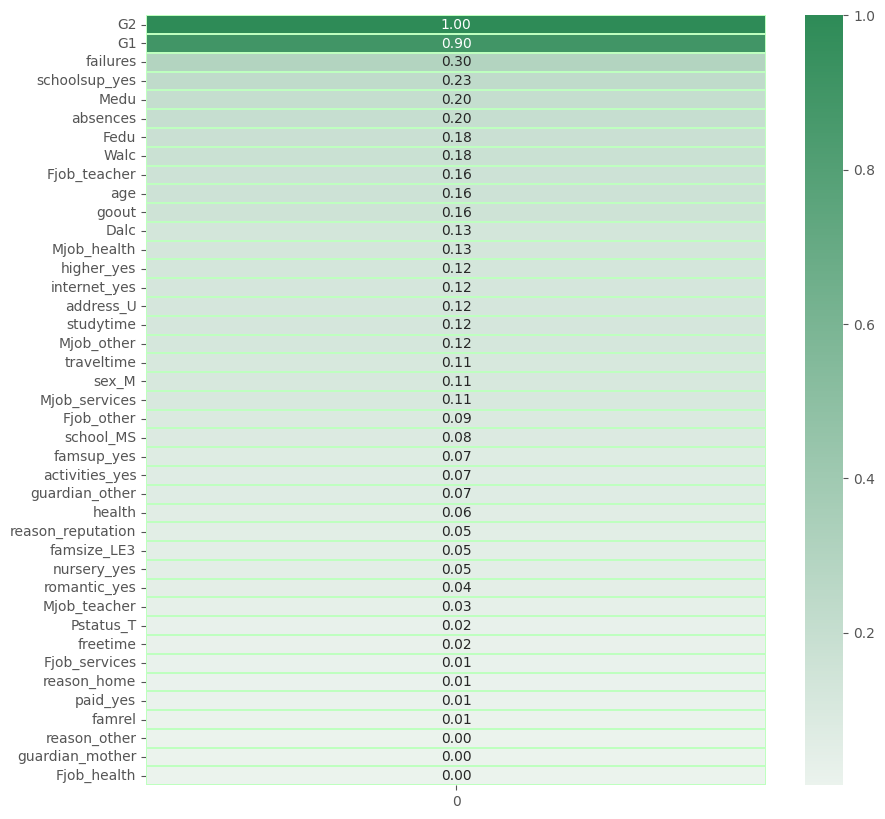

In [ ]:
# See the correlations
# Let's check the correlation of the different variables with oure target variable
corr = abs(data_ohe.drop(["G3"],axis=1).corrwith(data["G2"])) # Take absolute value beacuse we only care wether the data correlates well or not, not about the direction of correlation
corr = corr.sort_values(ascending=False) # Sort by most corralation to least corralation

# Plot the heatmap of correlations
plt.figure(figsize=(10,10))
custom_cmap = sb.light_palette("seagreen", as_cmap=True)
sb.heatmap(pd.DataFrame(corr), cmap=custom_cmap, annot=True, linecolor = "#BEFFBF", linewidths=0.2, fmt=".2f")

In [ ]:
# Tweaking the input data based on correlation
corr_min = 0.15
data_ohe_g2_after_corr = data_ohe.drop(["G3"], axis=1).loc[:, abs(data_ohe.corr()['G2']) >= corr_min]
used_cols = list(data_ohe_g2_after_corr.columns)

print(f"Columns in use (corr_min = {corr_min}):\n{used_cols}")

Columns in use (corr_min = 0.15):
['age', 'Medu', 'Fedu', 'failures', 'goout', 'Walc', 'absences', 'G1', 'G2', 'Fjob_teacher', 'schoolsup_yes']


##Predicting just on a pass / fail

In [ ]:
# make the target variables into pass and fail
y = data_ohe_after_corr["G3"]
y = np.where(y>5, "pass", "fail").reshape(-1,1)
X = data_ohe_after_corr.drop(["G3"], axis=1)

In [ ]:
# split in into train and test sets again

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.10, random_state=1, shuffle=True)
# X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.10, random_state=1) # 0.25 x 0.8 = 0.2

print(f"X_train: {len(X_train)}, X_test: {len(X_test)}")

X_train: 321, X_test: 36


In [ ]:
# Test classification models on pass-fail data
run_class(X_train, y_train, X_test, y_test)

0
1
2
3
4


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_bagging.py:802: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
<ipython-input-210-042cff8de2f5>:16: DataCo

5
6


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


,Test Accuracy
BaggingClassifier,1.0
DecisionTreeClassifier,1.0
LinearSVC,0.944444
KNeighborsClassifier,1.0
RandomForestClassifier,1.0
GradientBoostingClassifier,1.0
SVC,0.972222


In [ ]:
X.shape, y.shape

((357, 10), (357, 1))

## Save model

In [ ]:
import pickle
print(pickle.format_version)

4.0


In [ ]:
# Save the best model (BaysianRide MSE: 0.58117)
with open('8_feature_grade_prediction_model.pkl','wb') as f:
    pickle.dump(model2,f)

In [ ]:
import sklearn
print(sklearn.__version__)

1.2.2


In [ ]:
X_test

,Medu,Fedu,failures,goout,Walc,absences,G1,G2,Fjob_teacher,schoolsup_yes
299,4,4,0,2,2,5,16,15,1,0
256,4,2,0,3,1,6,14,12,0,0
368,2,3,0,3,2,0,11,10,0,0
183,3,3,0,3,3,56,9,9,0,0
355,3,3,0,4,1,0,10,9,0,0
331,2,4,0,3,1,7,12,14,0,0
230,4,3,0,3,2,14,13,13,0,0
65,4,3,0,3,2,2,16,15,0,0
276,3,2,0,1,1,75,10,9,0,0
314,1,1,2,2,1,14,15,13,0,0


In [ ]:
list(X_test.iloc[0])

[4, 4, 0, 2, 2, 5, 16, 15, 1, 0]